# library

In [7]:
import sklearn
import pdb
import numpy as np 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2)

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# create data

Giả sử thời gian học và khả năng đỗ/trượt của học sinh được cho bởi dữ liệu sau

In [12]:
X = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [11]:
def plot_data(X, y):
    # vẽ các nhãn 0
    X0 = X[np.where(y == 0)]
    y0 = y[np.where(y == 0)]
    plt.plot(X0, y0, 'ro', markersize = 8)
    
    #vẽ các nhãn 1
    X1 = X[np.where(y == 1)]
    y1 = y[np.where(y == 1)]    
    plt.plot(X1, y1, 'bs', markersize = 8)

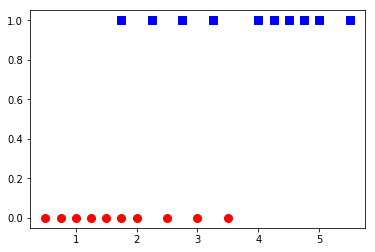

In [13]:
plot_data(X, y)

Vấn đề về dữ liệu này: Không  linearly separable

Có những cách nào có thể sử dụng để phân chia dữ liệu này?

## linear function

In [1]:
def plot_funct(funct, start = 0, stop = 5, n = 100, **kargs):
    #Sử dụng để vẽ hàm y = f(x)
    xs = np.linspace(start, stop, n) #khởi tạo chuỗi n giá trị từ giá trị start tới giá trị stop
    ys = funct(xs, **kargs) #tính các giá trị y
    plt.plot(xs, ys) #vẽ

In [2]:
def f(x): return x/3 - 0.3

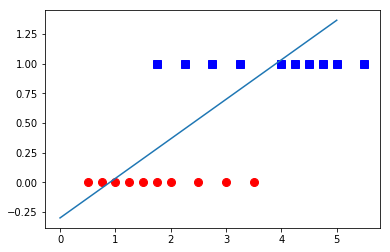

In [14]:
plot_data(X, y)
plot_funct(f)

Không cho chúng ta biết được xác suất đỗ/trượt. Không bị chặn ở khoảng [0,1]

## hard function

In [15]:
def f(x): return (x > 2).astype(int)

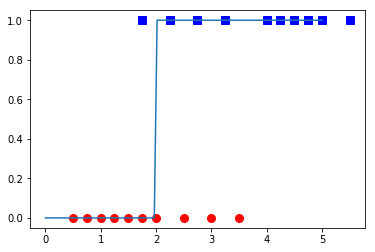

In [16]:
plot_data(X, y)
plot_funct(f)

Bị chặn ở khoảng [0,1] nhưng khả năng phân loại kém. chúng ta chỉ có thể nói rằng người học nhiều hơn thì có khẳ năng đậu cao hơn chứ không thể phân định cứng được

# logistic regression with sklearn

In [14]:
clf = LogisticRegression(C=1e4)

In [15]:
clf.fit(X.reshape(-1, 1), y)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
X.reshape(-1, 1)[:3]

array([[0.5 ],
       [0.75],
       [1.  ]])

In [17]:
clf.predict_proba(X.reshape(-1, 1)[:3])

array([[0.96525015, 0.03474985],
       [0.95017696, 0.04982304],
       [0.92904621, 0.07095379]])

## coef and intercept

In [95]:
intercept = clf.intercept_[0]; intercept

-4.0762940887470505

In [96]:
coef = clf.coef_[0][0]; coef

1.504164400934044

## plot

In [156]:
def f(x): return clf.predict_proba(x.reshape(-1, 1))[:,1]

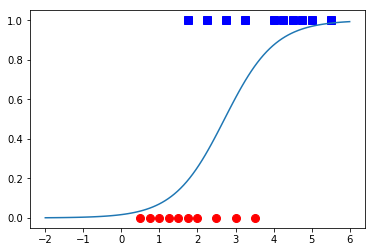

In [158]:
plot_data(X, y)
plot_funct(f, start=-2, stop = 6)

Ở đây hàm số là hàm dự đoán bởi mô hình. Thấy rằng hàm số có dạng đường cong mềm chứ không phải đường cong cứng như ở phần 2.2 

# algorithms

## plot function

In [44]:
def plot_scatter(coefs, intercepts, loss_results = None, label = True):
    sns.scatterplot(coefs, intercepts, hue = loss_results, legend=False)
    if label:
        plt.xlabel("coef")
        plt.ylabel("intercept")

In [45]:
def plot_predict(f, coef_choose, intercept_choose, x, y, activation_funct, start=-2, stop = 6):
    plot_data(x, y)
    plot_funct(f, start=-2, stop = 6)

## predict function

In [46]:
def sigmoid(x): return 1/(1+np.exp(-x))

In [47]:
def activation_funct(x): return sigmoid(x)

In [50]:
def linear(x, coef, intercept): return x*coef + intercept

In [51]:
def predict(x, coef, intercept, activation_funct = sigmoid): return activation_funct(linear(x, coef, intercept))

## loss funtion

In [48]:
def cross_entropy_loss(y_true, y_pred):
    return np.sum([-np.log(y_p) if y_t == 1 else -np.log(1-y_p) for y_t, y_p in zip(y_true, y_pred)])

In [49]:
def loss_funct(y_true, y_pred): return cross_entropy_loss(y_true, y_pred)

## learner

In [52]:
def learner(x = X, y = y, loss_funct = loss_funct, activation_funct = activation_funct,
            start_coef = -2, stop_coef = 5, start_intercept = -5, stop_intercept = 2,
            num = 50, debug = False):
    
    #khởi tạo giá trị ban đầu
    if debug: pdb.set_trace()
    coefs = []; intercepts = []; loss_results = []
    global_minima = 1e9; coef_choose = 0; intercept_choose = 0
    
    for coef in np.linspace(start_coef, stop_coef, space):
        for intercept in np.linspace(start_intercept, stop_intercept, space):            
            
            y_pred = predict(x, coef, intercept, activation_funct)            
            loss_result = loss_funct(y, y_pred)
            
            coefs.append(coef)
            intercepts.append(intercept)
            loss_results.append(loss_result)
            
            if loss_result < global_minima:
                coef_choose = coef
                intercept_choose = intercept
                global_minima = loss_result
                
    print('local minima: ', global_minima)
    print('coef: ', coef_choose)
    print('intercept: ', intercept_choose)
    return coefs, coef_choose, intercepts, intercept_choose, loss_results

In [53]:
coefs, coef_choose, intercepts, intercept_choose, loss_results = learner()

local minima:  8.036727016059594
coef:  1.5714285714285712
intercept:  -4.285714285714286


## debug

In [55]:
coefs, coef_choose, intercepts, intercept_choose, loss_results =  learner(debug = True)

> <ipython-input-52-b69d2c2d6b64>(6)learner()
-> coefs = []; intercepts = []; loss_results = []
(Pdb) n
> <ipython-input-52-b69d2c2d6b64>(7)learner()
-> global_minima = 1e9; coef_choose = 0; intercept_choose = 0
(Pdb) n
> <ipython-input-52-b69d2c2d6b64>(9)learner()
-> for coef in np.linspace(start_coef, stop_coef, space):
(Pdb) n
> <ipython-input-52-b69d2c2d6b64>(10)learner()
-> for intercept in np.linspace(start_intercept, stop_intercept, space):
(Pdb) n
> <ipython-input-52-b69d2c2d6b64>(12)learner()
-> y_pred = predict(X, coef, intercept, activation_funct)
(Pdb) s
--Call--
> <ipython-input-51-06dda2fe4ed8>(1)predict()
-> def predict(x, coef, intercept, activation_funct = sigmoid): return activation_funct(linear(x, coef, intercept))
(Pdb) s
> <ipython-input-51-06dda2fe4ed8>(1)predict()
-> def predict(x, coef, intercept, activation_funct = sigmoid): return activation_funct(linear(x, coef, intercept))
(Pdb) s
--Call--
> <ipython-input-50-67f1955e03e8>(1)linear()
-> def linear(x, coef, i

## find global minima

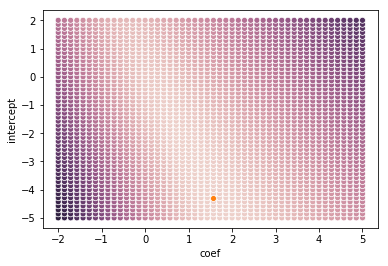

In [56]:
plot_scatter(coefs, intercepts, loss_results)
plot_scatter([coef_choose], [intercept_choose], label=False)

## linear

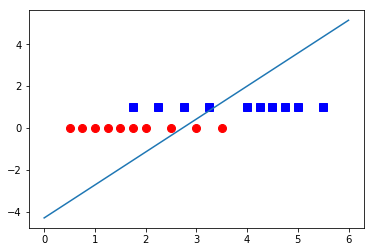

In [57]:
plot_data(X, y)
plot_funct(linear, start=0, stop = 6, coef = coef_choose, intercept = intercept_choose)

## sigmoid

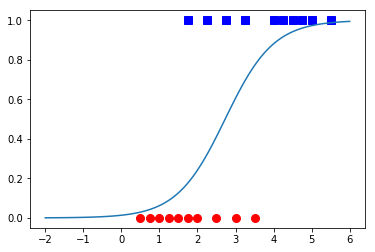

In [58]:
plot_data(X, y)
plot_funct(predict, start=-2, stop = 6, coef = coef_choose, intercept = intercept_choose)

## cross entropy loss

In [32]:
??cross_entropy_loss

bản chất là đánh phạt đối với các trường hợp không chính xác

giá trị loss trong trường hợp nhãn bằng 1, rõ ràng, khi càn gần 1, giá trị loss càng giảm, trong khi dự đoán càng nhỏ, giá trị loss càng cao

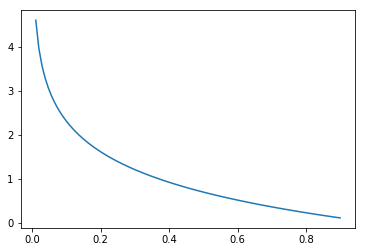

In [60]:
f = lambda x: -np.log(x)
plot_funct(f, start=0.01, stop=0.9)

tương tự với nhãn 0

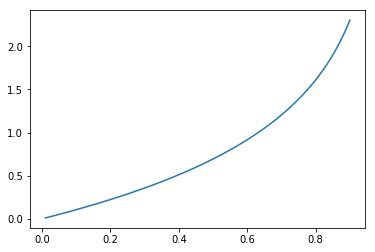

In [61]:
f = lambda x: -np.log(1-x)
plot_funct(f, start=0.01, stop=0.9)

# two dimensional data

![title](log_reg_2_dim.gif)

![title](logistic_2d_2.png)

# different activation function

## tanh?

sigmoid funtion

![title](sigmoid.png)

In [34]:
??sigmoid

tanh function

![title](tanh.png)

![title](tanh_line.png)

In [197]:
def tanh(x): return (np.exp(x) - np.exp(-x))/(np.exp(x) - np.exp(-x))

In [ ]:
learner(activation_funct = tanh)

# customize loss function

## weighted loss

In [209]:
def weighted_loss(y_true, y_pred):
    return -np.sum([np.log(y_p)*0.8 if y_t == 1 else np.log(1-y_p)*0.2 for y_t, y_p in zip(y_true, y_pred)])

In [280]:
coefs, coef_choose, intercepts, intercept_choose, loss_results = learner(loss_funct = weighted_loss)

local minima:  8.030594311987027
coef:  1.5714285714285712
intercept:  -2.857142857142857


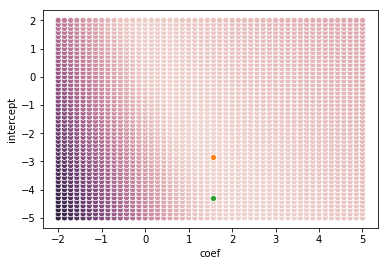

In [281]:
plot_scatter(coefs, intercepts, loss_results)
plot_scatter([coef_choose], [intercept_choose], label=False)
plot_scatter([1.5714285714285712], [-4.285714285714286], label=False)

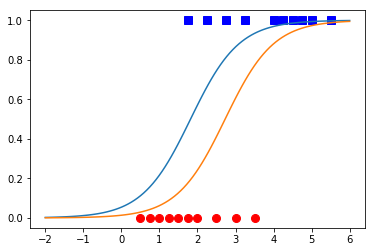

In [282]:
plot_data(X, y)
plot_funct(predict, start=-2, stop = 6, coef = coef_choose, intercept = intercept_choose)
plot_funct(predict, start=-2, stop = 6, coef=1.5714285714285712, intercept=-4.285714285714286)

## advance: focal loss?

https://arxiv.org/abs/1708.02002

![title](focal_loss.png)

???


#  so sánh kết quả của mô hình sau khi tùy biến?

# Thử với các bộ dữ liệu khác?